In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests as req
import numpy as np
import time
from citipy import citipy
from weatherfig import api_key
from datetime import datetime

In [2]:
# Generating random latitudes and longitudes for 1200 cities
lat = np.random.uniform(low=-90, high=90, size=1200)
lng = np.random.uniform(low=-180, high=180, size=1200)

# Creating coordinate pairs
coordinates = []
for x in range(0,len(lat)):
    coordinates.append((lat[x], lng[x]))
# print (coordinates)

In [3]:
# Finding the cities nearest to the coordinates
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))

# Creating DataFrame
cities_df = pd.DataFrame(cities)
cities_df["City Name"] = ""
cities_df["Country Code"] = ""

for index, row in cities_df.iterrows():
    row["City Name"] = cities_df.iloc[index,0].city_name
    row["Country Code"] = cities_df.iloc[index,0].country_code

# Dropping duplicate cities
cities_df.drop_duplicates(['City Name', 'Country Code'], inplace=True)
cities_df.reset_index(inplace=True)

# Deleting unnecessary columns
del cities_df[0]
del cities_df['index']

cities_df.head()

,City Name,Country Code
0,neiafu,to
1,ushuaia,ar
2,port blair,in
3,puerto ayora,ec
4,mys shmidta,ru


In [4]:
# Adding columns for values
cities_df['Latitude'] = ""
cities_df['Longitude'] = ""
cities_df['Temperature (F)'] = ""
cities_df['Humidity (%)'] = ""
cities_df['Cloudiness (%)'] = ""
cities_df['Wind Speed (mph)'] = ""

cities_df.head()

,City Name,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,neiafu,to,,,,,,
1,ushuaia,ar,,,,,,
2,port blair,in,,,,,,
3,puerto ayora,ec,,,,,,
4,mys shmidta,ru,,,,,,


In [7]:
# Accessing data
print("Beginning Data Retrieval")
print("---------------------------------")

# Limiting pull requests
start_time = time.time()

for index, row in cities_df.iterrows():
    # Building target url
    url = "http://api.openweathermap.org/data/2.5/weather?q=%s,%s&units=imperial&appid=%s" % (row['City Name'], 
                                                                                              row['Country Code'], api_key)
    # Printing to ensure loop is correct
    print("Now retrieving City #" + str(index) + ": " + row['City Name'] + ", " + row['Country Code'])
    print(url)
    
    # Running request
    weather_data = req.get(url).json()
    
    try:
        # Appending latitude and longitude to correct location
        row['Latitude'] = weather_data['coord']['lat']
        row['Longitude'] = weather_data['coord']['lon']
    
        # Appending temperature to correct location
        row['Temperature (F)'] = weather_data['main']['temp']
    
        # Appending humidity to correct location
        row['Humidity (%)'] = weather_data['main']['humidity']
    
        # Appending cloudiness to correct location
        row['Cloudiness (%)'] = weather_data['clouds']['all']
    
        # Appending wind speed to correct location
        row['Wind Speed (mph)'] = weather_data['wind']['speed']
    except:
        print("Error with city data. Skipping")
        continue
        
    # Pausing to limit pull requests
    if (index + 1) % 60 == 0:
        run_time = time.time() - start_time
        time.sleep(60 - run_time)
        start_time = time.time()
    
print("---------------------------------")
print("Data Retrieval Complete")
print("---------------------------------")

# Changing strings to floats
columns = ['Latitude', 'Temperature (F)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (mph)']
for column in columns:
    cities_df[column] = pd.to_numeric(cities_df[column], errors='coerce')
    
# Dropping NaN values
cities_df.dropna(inplace=True)

cities_df.head()

Beginning Data Retrieval
---------------------------------
Now retrieving City #0: neiafu, to
http://api.openweathermap.org/data/2.5/weather?q=neiafu,to&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #1: ushuaia, ar
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #2: port blair, in
http://api.openweathermap.org/data/2.5/weather?q=port blair,in&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #3: puerto ayora, ec
http://api.openweathermap.org/data/2.5/weather?q=puerto ayora,ec&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #4: mys shmidta, ru
http://api.openweathermap.org/data/2.5/weather?q=mys shmidta,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Error with city data. Skipping
Now retrieving City #5: kununurra, au
http://api.openweathermap.org/data/2.5/weather?q=kununurra,au&units=imperial&appid=997ac1bb517def3f5

Now retrieving City #54: viedma, ar
http://api.openweathermap.org/data/2.5/weather?q=viedma,ar&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #55: kavieng, pg
http://api.openweathermap.org/data/2.5/weather?q=kavieng,pg&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #56: dillon, us
http://api.openweathermap.org/data/2.5/weather?q=dillon,us&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #57: bluff, nz
http://api.openweathermap.org/data/2.5/weather?q=bluff,nz&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #58: nome, us
http://api.openweathermap.org/data/2.5/weather?q=nome,us&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #59: aginskoye, ru
http://api.openweathermap.org/data/2.5/weather?q=aginskoye,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #60: tilichiki, ru
http://api.openweathermap.org/data/2.5/weather?q=tilichiki,ru&uni

Now retrieving City #108: chuy, uy
http://api.openweathermap.org/data/2.5/weather?q=chuy,uy&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #109: kozhva, ru
http://api.openweathermap.org/data/2.5/weather?q=kozhva,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #110: alyangula, au
http://api.openweathermap.org/data/2.5/weather?q=alyangula,au&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #111: kosh-agach, ru
http://api.openweathermap.org/data/2.5/weather?q=kosh-agach,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #112: mahebourg, mu
http://api.openweathermap.org/data/2.5/weather?q=mahebourg,mu&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #113: lebu, cl
http://api.openweathermap.org/data/2.5/weather?q=lebu,cl&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #114: matara, lk
http://api.openweathermap.org/data/2.5/weather?q=ma

Now retrieving City #161: saint anthony, ca
http://api.openweathermap.org/data/2.5/weather?q=saint anthony,ca&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Error with city data. Skipping
Now retrieving City #162: hofn, is
http://api.openweathermap.org/data/2.5/weather?q=hofn,is&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #163: kenora, ca
http://api.openweathermap.org/data/2.5/weather?q=kenora,ca&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #164: komsomolskiy, ru
http://api.openweathermap.org/data/2.5/weather?q=komsomolskiy,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #165: longyearbyen, sj
http://api.openweathermap.org/data/2.5/weather?q=longyearbyen,sj&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #166: mattru, sl
http://api.openweathermap.org/data/2.5/weather?q=mattru,sl&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #167: blyznyuky

Now retrieving City #214: loandjili, cg
http://api.openweathermap.org/data/2.5/weather?q=loandjili,cg&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #215: sibu, my
http://api.openweathermap.org/data/2.5/weather?q=sibu,my&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #216: qaanaaq, gl
http://api.openweathermap.org/data/2.5/weather?q=qaanaaq,gl&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #217: tuatapere, nz
http://api.openweathermap.org/data/2.5/weather?q=tuatapere,nz&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #218: wagar, sd
http://api.openweathermap.org/data/2.5/weather?q=wagar,sd&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #219: candawaga, ph
http://api.openweathermap.org/data/2.5/weather?q=candawaga,ph&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Error with city data. Skipping
Now retrieving City #220: tutoia, br
http://api.openwea

Now retrieving City #267: guerrero negro, mx
http://api.openweathermap.org/data/2.5/weather?q=guerrero negro,mx&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #268: balotra, in
http://api.openweathermap.org/data/2.5/weather?q=balotra,in&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #269: mormugao, in
http://api.openweathermap.org/data/2.5/weather?q=mormugao,in&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Error with city data. Skipping
Now retrieving City #270: tomigusuku, jp
http://api.openweathermap.org/data/2.5/weather?q=tomigusuku,jp&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #271: qaqortoq, gl
http://api.openweathermap.org/data/2.5/weather?q=qaqortoq,gl&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #272: bonavista, ca
http://api.openweathermap.org/data/2.5/weather?q=bonavista,ca&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #273: los

Now retrieving City #319: faya, td
http://api.openweathermap.org/data/2.5/weather?q=faya,td&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Error with city data. Skipping
Now retrieving City #320: la carolina, es
http://api.openweathermap.org/data/2.5/weather?q=la carolina,es&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #321: wuda, cn
http://api.openweathermap.org/data/2.5/weather?q=wuda,cn&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #322: katangli, ru
http://api.openweathermap.org/data/2.5/weather?q=katangli,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #323: cidreira, br
http://api.openweathermap.org/data/2.5/weather?q=cidreira,br&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #324: wolfville, ca
http://api.openweathermap.org/data/2.5/weather?q=wolfville,ca&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #325: kloulklubed, pw
http://api.

Now retrieving City #373: matay, eg
http://api.openweathermap.org/data/2.5/weather?q=matay,eg&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #374: scutelnici, ro
http://api.openweathermap.org/data/2.5/weather?q=scutelnici,ro&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #375: great falls, us
http://api.openweathermap.org/data/2.5/weather?q=great falls,us&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #376: tarko-sale, ru
http://api.openweathermap.org/data/2.5/weather?q=tarko-sale,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #377: voskresenskoye, ru
http://api.openweathermap.org/data/2.5/weather?q=voskresenskoye,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #378: berlevag, no
http://api.openweathermap.org/data/2.5/weather?q=berlevag,no&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #379: byron bay, au
http://api.openw

Now retrieving City #426: sobolevo, ru
http://api.openweathermap.org/data/2.5/weather?q=sobolevo,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #427: poya, nc
http://api.openweathermap.org/data/2.5/weather?q=poya,nc&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #428: honiara, sb
http://api.openweathermap.org/data/2.5/weather?q=honiara,sb&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #429: constitucion, cl
http://api.openweathermap.org/data/2.5/weather?q=constitucion,cl&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #430: saldanha, za
http://api.openweathermap.org/data/2.5/weather?q=saldanha,za&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #431: xining, cn
http://api.openweathermap.org/data/2.5/weather?q=xining,cn&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #432: oume, ci
http://api.openweathermap.org/data/2.5/weather?

Now retrieving City #479: gunnedah, au
http://api.openweathermap.org/data/2.5/weather?q=gunnedah,au&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #480: aranos, na
http://api.openweathermap.org/data/2.5/weather?q=aranos,na&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #481: petropavlovsk-kamchatskiy, ru
http://api.openweathermap.org/data/2.5/weather?q=petropavlovsk-kamchatskiy,ru&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #482: senanga, zm
http://api.openweathermap.org/data/2.5/weather?q=senanga,zm&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #483: barbar, sd
http://api.openweathermap.org/data/2.5/weather?q=barbar,sd&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Error with city data. Skipping
Now retrieving City #484: jega, ng
http://api.openweathermap.org/data/2.5/weather?q=jega,ng&units=imperial&appid=997ac1bb517def3f586c903aa0200103
Now retrieving City #485: cot

,City Name,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,neiafu,to,-18.65,-173.98,82.40,83.0,40.0,10.29
1,ushuaia,ar,-54.81,-68.31,30.20,86.0,75.0,24.16
2,port blair,in,11.67,92.75,82.08,100.0,56.0,16.15
3,puerto ayora,ec,-0.74,-90.35,71.37,100.0,20.0,11.45
5,kununurra,au,-15.77,128.74,80.60,12.0,8.0,13.87


In [ ]:
# Exporting DataFrame
# cities_df.to_csv("WeatherPy/Weather-Analysis/Output/weather_data.csv")

# Latitude vs. Temperature Plot 

FileNotFoundError: [Errno 2] No such file or directory: 'Weather_Analysis/Latitude_Temperature.png'

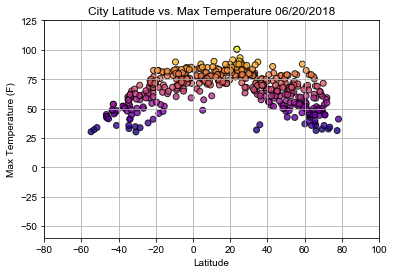

In [8]:
plt.scatter(cities_df["Latitude"], 
            cities_df["Temperature (F)"], c=cities_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 125])

# Save the figure
plt.savefig("Weather_Analysis/Latitude_Temperature.png")

# Show plot
plt.show()

# Lattitude vs Humidity 

FileNotFoundError: [Errno 2] No such file or directory: 'Weather_Analysis/Latitude_Humidity.png'

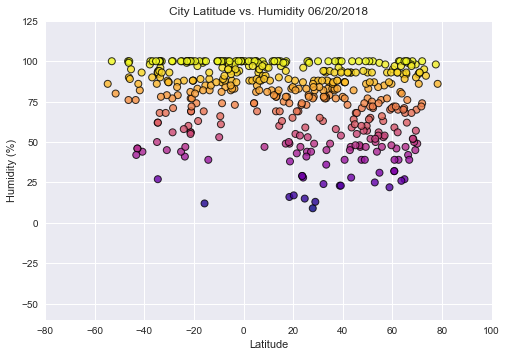

In [9]:
plt.scatter(cities_df["Latitude"], 
            cities_df["Humidity (%)"], c=cities_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 125])

# Save the figure
plt.savefig("Weather_Analysis/Latitude_Humidity.png")

# Show plot
plt.show()

# City Latitude vs Cloudiness (%)

FileNotFoundError: [Errno 2] No such file or directory: 'Weather_Analysis/Latitude_Humidity.png'

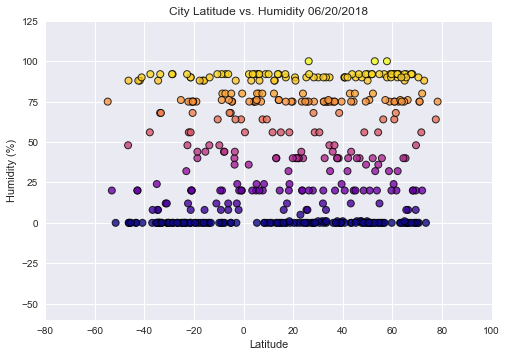

In [10]:
plt.scatter(cities_df["Latitude"], 
            cities_df["Cloudiness (%)"], c=cities_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 125])

# Save the figure
plt.savefig("Weather_Analysis/Latitude_Humidity.png")

# Show plot
plt.show()

# Wind Speed (mph) vs. Latitude


FileNotFoundError: [Errno 2] No such file or directory: 'WeatherPy_analysis/Latitude_WindSpeed.png'

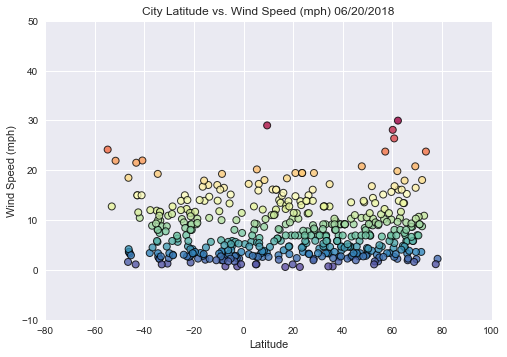

In [11]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(cities_df["Latitude"], 
            cities_df["Wind Speed (mph)"], c=cities_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Spectral_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed (mph) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])

# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_WindSpeed.png")

# Show plot
plt.show()